In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Housing.csv')

In [5]:
housing = df
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
m = len(housing)
m

545

In [7]:
housing.shape

(545, 13)

In [8]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [9]:
df_test.shape

(109, 13)

In [10]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_newtrain = df_train[num_vars]
df_newtest = df_test[num_vars]
df_newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
542,3620,2,1,1,0,1750000
496,4000,2,1,1,0,2695000
484,3040,2,1,1,0,2870000
507,3600,2,1,1,0,2590000
252,9860,3,1,1,0,4515000


In [11]:
df_newtest.head()

,area,bedrooms,bathrooms,stories,parking,price
239,4000,3,1,2,1,4585000
113,9620,3,1,1,2,6083000
325,3460,4,1,2,0,4007500
66,13200,2,1,1,1,6930000
479,3660,4,1,2,0,2940000


In [12]:
df_newtrain.shape

(436, 6)

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
df_newtrain[num_vars] = scaler.fit_transform(df_newtrain[num_vars])
df_newtrain.head()

C:\Users\Sanaz\AppData\Local\Temp\ipykernel_5564\3222130785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newtrain[num_vars] = scaler.fit_transform(df_newtrain[num_vars])


,area,bedrooms,bathrooms,stories,parking,price
542,-0.716772,-1.294376,-0.573307,-0.933142,-0.819149,-1.586001
496,-0.538936,-1.294376,-0.573307,-0.933142,-0.819149,-1.090971
484,-0.988206,-1.294376,-0.573307,-0.933142,-0.819149,-0.999299
507,-0.726132,-1.294376,-0.573307,-0.933142,-0.819149,-1.145974
252,2.203478,0.052516,-0.573307,-0.933142,-0.819149,-0.137579


In [14]:
scaler = StandardScaler()
df_newtest[num_vars] = scaler.fit_transform(df_newtest[num_vars])
df_newtest.head()

C:\Users\Sanaz\AppData\Local\Temp\ipykernel_5564\3137508404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newtest[num_vars] = scaler.fit_transform(df_newtest[num_vars])


,area,bedrooms,bathrooms,stories,parking,price
239,-0.500735,0.025607,-0.563545,0.272416,0.492144,-0.081358
113,1.954229,0.025607,-0.563545,-0.915317,1.739673,0.801114
325,-0.736621,1.421209,-0.563545,0.272416,-0.755384,-0.421563
66,3.518067,-1.369995,-0.563545,-0.915317,0.492144,1.300082
479,-0.649256,1.421209,-0.563545,0.272416,-0.755384,-1.050428


In [15]:
y_test = df_newtest.pop('price')
x_test = df_newtest.copy()

y_train = df_newtrain.pop('price')
x_train = df_newtrain.copy()

In [16]:
x1 = x_train.values[:, 0]
x2 = x_train.values[:, 1]
x3 = x_train.values[:, 2]
x4 = x_train.values[:, 3]
x5 = x_train.values[:, 4]
y = y_train.values
m = len(y)
print('x =', x1[: 10])
print('y =', y[: 10])
print('m =', m)
len(x1)

x = [-0.71677205 -0.53893631 -0.98820554 -0.72613182  2.20347795 -0.55391195
 -0.61381451  2.17539862 -0.70741227 -0.76357092]
y = [-1.5860012  -1.09097091 -0.99929863 -1.14597428 -0.13757923 -0.1925826
 -0.10091032  0.24744433 -0.63260953 -0.59594061]
m = 436


436

In [17]:
x_1 = x_test.values[:, 0]
x_2 = x_test.values[:, 1]
x_3 = x_test.values[:, 2]
x_4 = x_test.values[:, 3]
x_5 = x_test.values[:, 4]
y_test = y_test.values
n = len(y_test)
print('x =', x_1[: 10])
print('y =', y_test[: 10])
print('n =', n)
len(x_1)

x = [-0.50073521  1.95422869 -0.73662142  3.5180669  -0.64925616  0.52580664
 -0.56625916 -0.72788489 -0.71390645  1.68339637]
y = [-0.08135801  0.80111439 -0.42156349  1.30008243 -1.05042817  0.86709364
 -0.69991343 -1.05042817 -0.72053194  1.91863786]
n = 109


109

Text(0.5, 1.0, 'Scatter Plot of Training Data')

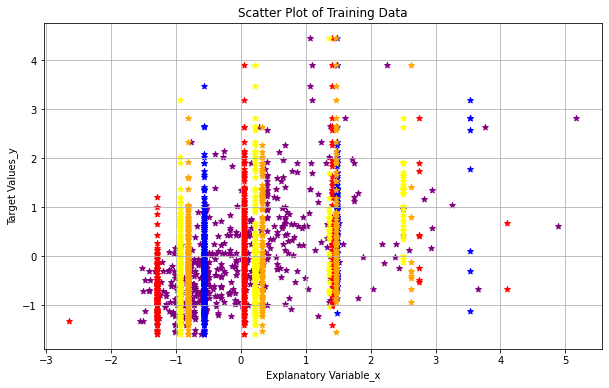

In [31]:
plt.scatter(x1, y, color = 'purple', marker = '*')
plt.scatter(x2, y, color = 'red', marker = '*')
plt.scatter(x3, y, color = 'blue', marker = '*')
plt.scatter(x4, y, color = 'yellow', marker = '*')
plt.scatter(x5, y, color = 'orange', marker = '*')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Explanatory Variable_x')
plt.ylabel('Target Values_y')
plt.title('Scatter Plot of Training Data')

In [19]:
x0 = np.ones((m, 1))
x1 = x1.reshape(m, 1)
x2 = x2.reshape(m, 1)
x3 = x3.reshape(m, 1)
x4 = x4.reshape(m, 1)
x5 = x5.reshape(m, 1)
x1[: 5], x2[: 5], x3[: 5], x4[: 5], x5[: 5]

(array([[-0.71677205],
        [-0.53893631],
        [-0.98820554],
        [-0.72613182],
        [ 2.20347795]]),
 array([[-1.29437561],
        [-1.29437561],
        [-1.29437561],
        [-1.29437561],
        [ 0.05251643]]),
 array([[-0.57330726],
        [-0.57330726],
        [-0.57330726],
        [-0.57330726],
        [-0.57330726]]),
 array([[-0.93314164],
        [-0.93314164],
        [-0.93314164],
        [-0.93314164],
        [-0.93314164]]),
 array([[-0.81914879],
        [-0.81914879],
        [-0.81914879],
        [-0.81914879],
        [-0.81914879]]))

In [20]:
X = np.hstack((x0, x1, x2, x3, x4, x5))
X[: 5]

array([[ 1.        , -0.71677205, -1.29437561, -0.57330726, -0.93314164,
        -0.81914879],
       [ 1.        , -0.53893631, -1.29437561, -0.57330726, -0.93314164,
        -0.81914879],
       [ 1.        , -0.98820554, -1.29437561, -0.57330726, -0.93314164,
        -0.81914879],
       [ 1.        , -0.72613182, -1.29437561, -0.57330726, -0.93314164,
        -0.81914879],
       [ 1.        ,  2.20347795,  0.05251643, -0.57330726, -0.93314164,
        -0.81914879]])

In [21]:
x_0 = np.ones((n, 1))
x_1 = x_1.reshape(n, 1)
x_2 = x_2.reshape(n, 1)
x_3 = x_3.reshape(n, 1)
x_4 = x_4.reshape(n, 1)
x_5 = x_5.reshape(n, 1)
x_0[: 5], x_1[: 5], x_2[: 5], x_3[: 5], x_4[: 5], x_5[: 5]

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 array([[-0.50073521],
        [ 1.95422869],
        [-0.73662142],
        [ 3.5180669 ],
        [-0.64925616]]),
 array([[ 0.02560738],
        [ 0.02560738],
        [ 1.42120937],
        [-1.36999462],
        [ 1.42120937]]),
 array([[-0.56354451],
        [-0.56354451],
        [-0.56354451],
        [-0.56354451],
        [-0.56354451]]),
 array([[ 0.27241586],
        [-0.91531729],
        [ 0.27241586],
        [-0.91531729],
        [ 0.27241586]]),
 array([[ 0.49214421],
        [ 1.73967255],
        [-0.75538413],
        [ 0.49214421],
        [-0.75538413]]))

In [22]:
X_test = np.hstack((x_0, x_1, x_2, x_3, x_4, x_5))
X_test[: 5]

array([[ 1.        , -0.50073521,  0.02560738, -0.56354451,  0.27241586,
         0.49214421],
       [ 1.        ,  1.95422869,  0.02560738, -0.56354451, -0.91531729,
         1.73967255],
       [ 1.        , -0.73662142,  1.42120937, -0.56354451,  0.27241586,
        -0.75538413],
       [ 1.        ,  3.5180669 , -1.36999462, -0.56354451, -0.91531729,
         0.49214421],
       [ 1.        , -0.64925616,  1.42120937, -0.56354451,  0.27241586,
        -0.75538413]])

In [23]:
theta = np.zeros((6, 1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [24]:
def compute_loss(X, y, theta):
   
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)


    return J

In [25]:
loss = compute_loss(X, y, theta)
print('The loss for all thetas =', loss)

The loss for all thetas = 218.00000000000006


In [26]:
def gradient_descent(X, y, theta, alpha, iterations, X_test, y_test): 
     
    loss_history = np.zeros(iterations)
    validation_loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        loss_history[i] = compute_loss(X, y, theta)
        validation_loss_history[i] = compute_loss(X_test, y_test, theta)
        
        
    return theta, loss_history, validation_loss_history   

In [27]:
theta = [0, 0, 0, 0, 0, 0]
iterations = 5000;
alpha = 0.01;

In [28]:
theta, loss_history, validation_loss_history = gradient_descent (X, y, theta, alpha, iterations, X_test, y_test)
print('Final value of theta =', theta)
print('loss_history =', loss_history)
print('validation_loss_history =', validation_loss_history)

Final value of theta = [2.70050292e-16 3.88481823e-01 8.90638389e-02 3.04158794e-01
 2.40439813e-01 1.60108157e-01]
loss_history = [0.49011053 0.48058679 0.47141506 ... 0.22309632 0.22309632 0.22309632]
validation_loss_history = [0.12240152 0.11989773 0.11748511 ... 0.04862154 0.04862154 0.04862154]


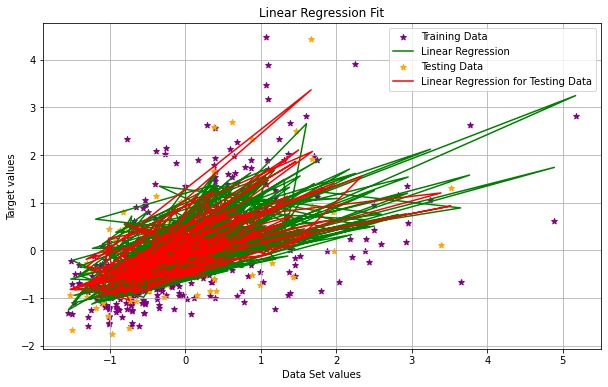

In [29]:
plt.scatter(X[:, 1], y, color = 'purple', marker = '*', label = 'Training Data')
plt.plot(X[:, 1], X.dot(theta), color = 'green', label = 'Linear Regression')
plt.scatter(X_test[:, 1], y_test, color = 'orange', marker = '*', label = 'Testing Data')
plt.plot(X_test[:, 1], X_test.dot(theta), color = 'red', label = 'Linear Regression for Testing Data')

plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Data Set values')
plt.ylabel('Target values')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

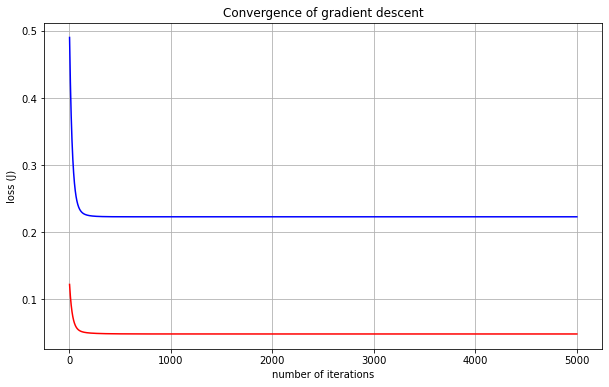

In [30]:
plt.plot(range(1, iterations + 1), loss_history, color = 'blue')
plt.plot(range(1, iterations + 1), validation_loss_history, color = 'red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('number of iterations')
plt.ylabel('loss (J)')
plt.title('Convergence of gradient descent')